# File and Package Import

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [9]:
# load the excel data
data = pd.read_excel('US Car.xlsx')

---

# Data Exploration 

Lets check the data types for each variable, note that that the only categorical variables (object) in the data set are "Luxury and standard" and "Car Type Combined". Simirlaly note that we have 205 observations and 45 columns .

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 45 columns):
 #   Column                                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                                   --------------  -----  
 0   Year                                                                                                                                     206 non-null    int64  
 1   Luxury or standard                                                                                                                       206 non-null    object 
 2   Car Type Combined                                                                                                                        206 non-null    object 
 3   I am loyal to one or more brands.                           

Lets also get a visual representation of the dataset. As you can see there are NaN values which means that the dataset has missing/empty values.

In [11]:
data.head()

,Year,Luxury or standard,Car Type Combined,I am loyal to one or more brands.,I prefer brands that give back to society.,"A brand's content must be authentic (true, transparent) before I will buy any of its product(s).","I enjoy interacting with a brand that engages me on social media (e.g., responding to my posts).",I am more likely to buy from a brand that interacts with users on social media sites.,I only want brands I choose to send me messages.,"I believe user- or peer-reviews on a product are more authentic (true, transparent) than the product description given by the company.",...,I would often got on my parents nerves when I was growing up.,I often obeyed rules and regulations that were established by my parents.,"Growing up, I acted in ways that my parents thought were objectionable.",I often do well at different things that I try.,Not being careful enough has gotten me into trouble at times.,I feel like I have made progress toward being successful in my life.,I have found very few hobbies or activities in my life that capture my interest or motivate me to put effort into them.,This exercise has helped me think about brands differently than before I started.,I would like to learn more about how consumers develop brand loyalty.,I think studying branding is very important for my learning more about marketing.
0,2023,Standard,Hyundai,5.0,4.0,5.0,5.0,5.0,NaN,NaN,...,2.0,5.0,2.0,5.0,1.0,4.0,5.0,5.0,5.0,5.0
1,2023,Luxury,Kia,5.0,5.0,4.0,5.0,5.0,NaN,5.0,...,5.0,5.0,4.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0
2,2023,Standard,Hyundai,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0
3,2023,Standard,Chevrolet,4.0,NaN,5.0,NaN,NaN,2.0,5.0,...,2.0,5.0,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,2023,Standard,Nissan,4.0,5.0,NaN,NaN,NaN,5.0,5.0,...,1.0,5.0,NaN,4.0,5.0,4.0,4.0,2.0,1.0,4.0


# Dropping a categorical variable

The following code counts the number of unique categories in each categorical variable. The results from running the code convey that the variable "Car Type Combined" has 49 categories. Creating dummy 49 dummy variables for a dataset of 200 observations is impractical so we will have to drop this column. 

In [12]:
#lets check the number of unique categories in our categorical variables
for column in data.columns:
    if data[column].dtype == 'object':  # if the column is categorical
        num_unique_categories = data[column].nunique()
        print(f'{column}: {num_unique_categories} unique categories')

Luxury or standard: 2 unique categories
Car Type Combined: 49 unique categories


In [13]:
# Drop the 'Car Type Combined' column
data = data.drop(columns=['Car Type Combined'])

# Imputation

As noted before the dataset had NaN values so we will have to impute them with a column median. Note that although we can also drop observations, the fact that we only have 200 observations makes this unpractical as we would lose too much data. Simirlaly, were using the median and not the mean because the data is mostly ordinal in nature and it dosent make sense to have decimal points in this values.

In [14]:
# Impute missing values with the median
data = data.fillna(data.median())
# Check the unique values in the 'Luxury or standard' column
data['Luxury or standard'].unique()

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_34152\908641388.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median())


array(['Standard', 'Luxury'], dtype=object)

In [15]:
# Checks for null values 
null_values = data.isnull().sum() 
print(null_values)

Year                                                                                                                                       0
Luxury or standard                                                                                                                         0
I am loyal to one or more brands.                                                                                                          0
 I prefer brands that give back to society.                                                                                                0
 A brand's content must be authentic (true, transparent) before I will buy any of its product(s).                                          0
I enjoy interacting with a brand that engages me on social media (e.g., responding to my posts).                                           0
 I am more likely to buy from a brand that interacts with users on social media sites.                                                     0
 I only want 

# Target Variable

Now lets hot encode our target variable 'Luxury or Standard' into a proper binary variable. For now on standard=0 and luxury=1

In [16]:
# Convert target variable to binary
data['Luxury or standard'] = data['Luxury or standard'].map({'Standard': 0, 'Luxury': 1})

# Data split

Lets now split the data into a 80% training and 20% testing

In [17]:
# Split the data into features and target variable
X = data.drop(columns='Luxury or standard')
y = data['Luxury or standard']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision tree

**Decision tree with cost-sensitive training**:This method doesn't alter the data, but instead changes the algorithm to pay more attention to the minority class. Many machine learning algorithms, including Decision Trees, allow you to set class weights to make the algorithm more sensitive to the minority class.

Now that the data is split we can train a decision tree model with cost-sensitive tranining. The results from running this code convey that our decision tree model is 85% accurate at predicting standard and 25% at predicting Luxury. The Luxury percent is rather low so we will use another model to see if we can get a better result for Luxury.

In [18]:
# Train a Decision Tree model
clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
# Print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.25      0.29      0.27         7

    accuracy                           0.74        42
   macro avg       0.55      0.56      0.55        42
weighted avg       0.75      0.74      0.74        42



# Random Forest

**Random Forest** : is an ensemble method that builds multiple decision trees and averages their predictions. This makes it more robust and less prone to overfitting than a single decision tree. Random Forest also handles class imbalance quite well. It has a class_weight parameter that can be set to 'balanced'. This will make the algorithm more sensitive to the minority class by giving it more weight.

The results from running the Random forest code convey that our decision tree model is 85% accurate at predicting standard and 50% accurate at predicting Luxury. This is a significant improvement but we can still do better. 

In [19]:
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest model
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
# Print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91        35
           1       0.50      0.14      0.22         7

    accuracy                           0.83        42
   macro avg       0.68      0.56      0.56        42
weighted avg       0.79      0.83      0.79        42



# Tuning the parameters of Random Forest

**Parameter tuning**: Involves adjusting the settings of the model to improve its performance. For a Random Forest model, some of the key parameters we will tune are:  

*n_estimators*: The number of trees in the forest.  
*max_depth*: The maximum depth of the trees.  
*min_samples_split*: The minimum number of samples required to split an internal node.  
*min_samples_leaf*: The minimum number of samples required to be at a leaf node.

Similarly, we will be using tuning with *grid* search, where we specify a set of possible values for each parameter, and then try every possible combination. Generally, this can be computationally expensive, especially with a large dataset, but considering that we only have 200 observations this will be feasible.


In [20]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize a Random Forest model
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
# Initialize the grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='f1')
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
# Get the best parameters
best_params = grid_search.best_params_
best_params

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

The following code trains our updated random forest with tuned specifications. The results convey that our model has an accuracy of 86% and correctly classifies Luxury 71% of the time. 

In [21]:
# Train a Random Forest model with the best parameters
clf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    class_weight='balanced',
    random_state=42
)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
# Print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        35
           1       0.56      0.71      0.63         7

    accuracy                           0.86        42
   macro avg       0.75      0.80      0.77        42
weighted avg       0.88      0.86      0.86        42



# Feature Importance

The following plot shows the importance of each feature in predicting whether a car is 'Luxury' or 'Standard', as determined by the Random Forest model. Features with higher importance like "makes me stand out" have more influence in the models prediction of standard or luxury. Another way to put it is "makes me stand out" means that this question played a more significant role in predicting whether a respondent would choose a luxury or standard car compared to other questions.

C:\Users\Eduardo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


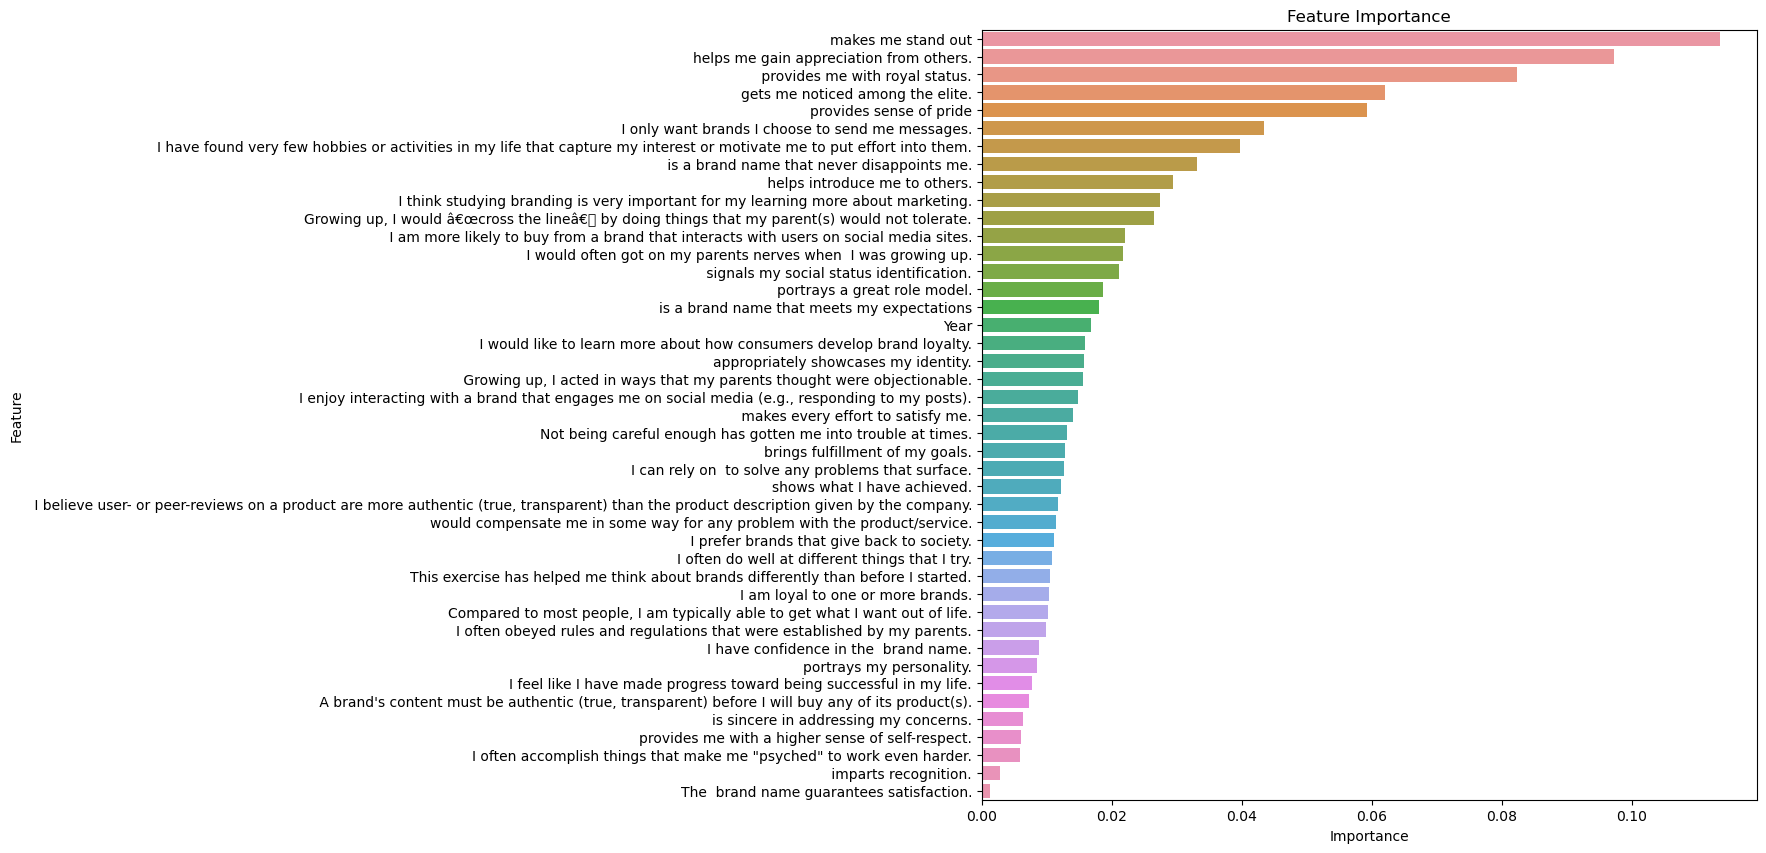

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# Get feature importances
importances = clf.feature_importances_
# Convert importances to a DataFrame
importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
# Sort by importance
importances_df = importances_df.sort_values('importance', ascending=False)
# Plot feature importances
plt.figure(figsize=(10, 10))
sns.barplot(x='importance', y='feature', data=importances_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
# Train a Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)
# Make predictions on the test set
y_pred = log_reg.predict(X_test)
# Print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.69      0.77        35
           1       0.27      0.57      0.36         7

    accuracy                           0.67        42
   macro avg       0.58      0.63      0.57        42
weighted avg       0.79      0.67      0.71        42



C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---

The following coefficients represent the change in the log-odds of the target variable ('Luxury or standard') for a one-unit increase in the corresponding feature, holding all other features constant.

For example, a one-unit increase in 'helps me gain appreciation from others' (i.e., **moving from 'strongly disagree' to 'disagree'**, or from **'neutral' to 'agree'**) is associated with an **increase** in the log-odds of the car being a luxury car by 1.285256, holding all other variables constant.

Conversly ,a one-unit increase in 'is a brand name that never disappoints me.' is associated with a **decrease** in the log-odds of the car being a luxury car by 1.68031, holding all other variables constant.

In [24]:
# Get the coefficients of the logistic regression model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
# Sort the coefficients by absolute value
coefficients['abs'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values('abs', ascending=False).drop('abs', axis=1)
coefficients

,Feature,Coefficient
10,is a brand name that never disappoints me.,-1.498241
23,helps me gain appreciation from others.,1.285256
5,I am more likely to buy from a brand that int...,1.085881
34,I often obeyed rules and regulations that were...,-1.061324
4,I enjoy interacting with a brand that engages ...,1.042661
6,I only want brands I choose to send me messages.,-0.941157
16,makes me stand out,0.861955
24,gets me noticed among the elite.,0.856903
8,is a brand name that meets my expectations,-0.740813
17,appropriately showcases my identity.,-0.740225
